In [1]:
#importing Various required libraries
import numpy as np
import pandas as pd
import operator
import os
import sys
from sklearn import model_selection
import re
import string
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
#stopwords list taken from intenet.
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

In [4]:
def retriveData():
    #Extracting Information from documents in 20_newsgroups
    X = [] 
    Y = [] 
    for category in os.listdir('C:/Users/Lakshay/Desktop/20_newsgroups'):
        for document in os.listdir('C:/Users/Lakshay/Desktop/20_newsgroups/'+category): 
            with open('C:/Users/Lakshay/Desktop/20_newsgroups/'+category+'/'+document, "r") as f:
                X.append((document,f.read()))
                Y.append(category)
    return X,Y
X,Y=retriveData()

In [5]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y)

In [6]:
def createDict(X_train):
    #To create dictionary of words from the given documents with their corresponding frequency
    vocab = {}
    for i in range(len(X_train)):
        word=X_train[i][1].lower()
        #splitting the text into words
        stripped=re.split(r'\W+',word)
        for word in stripped:
            if (word.isalpha()) and (len(word)>2)  and (word not in stopwords): 
                if word in vocab:
                    vocab[word]+=1
                else:
                    vocab[word]=1
    return vocab
vocab=createDict(X_train)

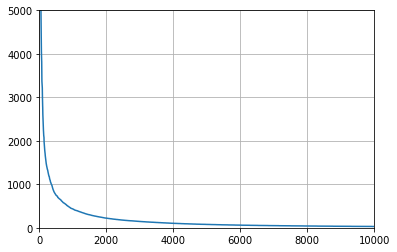

In [7]:
def plotGraph(vocab):
    #To create a sorted vocab dictionary & plotting the graph for the same
    sorted_vocab=[(i,vocab[i]) for i in sorted(vocab, key=vocab.get, reverse=True)]
    features=[]
    features_freq=[]
    for i in range(len(sorted_vocab)):
        features.append(i)
        features_freq.append(sorted_vocab[i][1])
    plt.plot(features,features_freq)
    plt.axis([0,10000,0,5000])
    plt.grid()
    plt.show()
    return sorted_vocab
sorted_vocab=plotGraph(vocab)

In [8]:
#taking top 2000 words as our feature
top_k_words=[sorted_vocab[i][0] for i in range(2000)]

In [9]:
def generate_TrainTestDataset(X_train,X_test,top_k_words):
    #To generate nD numpy array that contains of training & testing data with rows as no. of documents and column as top k words
    X_train_dataset=np.zeros([len(X_train),len(top_k_words)],int)
    X_test_dataset=np.zeros([len(X_test),len(top_k_words)],int)
    for i in range(len(X_train)):
        words=re.split(r'\W+',X_train[i][1].lower())
        for j in words:
            if j in top_k_words:
                X_train_dataset[i][top_k_words.index(j)]+=1

    for i in range(len(X_test)):
        words=re.split(r'\W+',X_test[i][1].lower())
        for j in words:
            if j in top_k_words:
                X_test_dataset[i][top_k_words.index(j)]+=1
    return X_train_dataset,X_test_dataset

X_train_dataset,X_test_dataset=generate_TrainTestDataset(X_train,X_test,top_k_words)

In [16]:
print('X_train_dataset:-')
print(X_train_dataset)
print()
print('...................')
print()
print('X_test_dataset:-')
print(X_test_dataset)

X_train_dataset:-
[[ 7  1  0 ...  0  0  0]
 [ 3  1  0 ...  0  0  0]
 [ 9  3  1 ...  0  0  0]
 ...
 [10  4  1 ...  0  0  0]
 [13  2  4 ...  0  0  0]
 [12  5  7 ...  0  0  0]]

...................

X_test_dataset:-
[[11  1  1 ...  0  0  0]
 [ 4  1  0 ...  0  0  0]
 [ 6  1  0 ...  0  0  0]
 ...
 [ 9  3  1 ...  0  0  0]
 [ 2  2  7 ...  0  0  0]
 [ 1  1  0 ...  0  0  0]]


In [11]:
#Using sklearn's Multinomial NB
clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)

Sklearn's score on training data : 0.8971127558845102


In [12]:
print("Sklearn's score on testing data :",sklearn_score_test)
print("Confusion Matrix for testing data :-")
print(confusion_matrix(Y_test,Y_test_pred))
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Sklearn's score on testing data : 0.8522
Confusion Matrix for testing data :-
[[192   1   0   0   0   0   0   1   1   0   0   0   0   0   0   3   0   3
    0  53]
 [  1 169  16  13  25   3   3   0   1   1   0   0   6   2   0   0   0   0
    0   0]
 [  0   3 198  16   5  17   6   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  1   2   8 200  35   2   3   1   0   0   0   1   1   0   0   0   0   0
    0   0]
 [  0   4   4  18 232   0   6   0   0   0   0   0   2   0   1   0   0   0
    0   0]
 [  0  13  31   6   6 180   4   0   0   0   0   0   2   0   1   0   0   0
    0   0]
 [  0   1   1   3   2   0 235   4   3   0   0   0   2   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   6 213   6   1   2   0   6   0   0   0   1   0
    2   0]
 [  0   0   0   0   0   1   2   8 243   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   4   4 226  10   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   2   3   9 236   0   0   0   1   0   0   

In [13]:
#Implementing Multinomial NB
class MNB:
    #creating class MNB
    def __init__(self):
        #To initialize the data members of class MNB
        self.dict_category_count={}
        self.classes = None
    
    def fit(self,x_train_dataset,y_train):
        #To fit the training data into MNB 
        y_train=np.array(y_train)
        self.dict_category_count["total_doc"]=len(y_train)
        self.classes=set(y_train)
        classes=set(y_train)
        for current_class in classes:
            total_word=0
            x_train_current=x_train_dataset[y_train==current_class]
            rows_x_train_current=x_train_current.shape[0]
            self.dict_category_count[current_class]={}
            for feature in top_k_words:
                feature_total_word=(x_train_current[:,top_k_words.index(feature)]).sum()
                self.dict_category_count[current_class][feature]=feature_total_word
                total_word+=feature_total_word
            self.dict_category_count[current_class]["word_in_class"]=total_word
            self.dict_category_count[current_class]["length_class"]=rows_x_train_current    

    def probability(self,x,class_name):    
        #finding probability of occurances of given class_name
        prob=np.log(self.dict_category_count[class_name]["length_class"])-np.log(self.dict_category_count["total_doc"])
        feature=list(self.dict_category_count[class_name].keys())
        x_total_words=len(feature)-2 
        for j in range (x_total_words):
            xj=x[j]
            if xj==0:
                current_prob=0
            else:
                #Extra addition part is Laplace Correction
                num=self.dict_category_count[class_name][feature[j]]+1
                den=self.dict_category_count[class_name]["word_in_class"]+x_total_words
                current_prob=(np.log(num)-np.log(den))
            prob+=current_prob
        return prob

    def predict_tup(self,x):
        #To find the best class
        first_run=True
        best_prob=None
        best_class=None
        for current_class in self.classes:
            if current_class=="total_doc":
                continue
            prob=self.probability(x,current_class)
            #best_class will have maximum probability
            if first_run or prob>best_prob:
                best_prob=prob
                first_run=False
                best_class=current_class
        return best_class

    def predict(self,x_test):
        #To predict the class
        y_pred=[]
        for x in x_test:
            x_class=self.predict_tup(x)
            y_pred.append(x_class)
        return y_pred

    def score(self,y_test,y_pred):
        #To calculate the mean accuracy
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [14]:
#Using Multinomial NB
clf2 = MNB()
clf2.fit(X_train_dataset,Y_train)
our_Y_test_pred = clf2.predict(X_test_dataset)
our_score_test = clf2.score(our_Y_test_pred,Y_test)  
print("Our score on testing data :",our_score_test)
print("Confusion Matrix for testing data :-")
print(confusion_matrix(Y_test,Y_test_pred))
print("Classification report for testing data :-")
print(classification_report(Y_test, our_Y_test_pred))

Our score on testing data : 0.8726
Confusion Matrix for testing data :-
[[192   1   0   0   0   0   0   1   1   0   0   0   0   0   0   3   0   3
    0  53]
 [  1 169  16  13  25   3   3   0   1   1   0   0   6   2   0   0   0   0
    0   0]
 [  0   3 198  16   5  17   6   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  1   2   8 200  35   2   3   1   0   0   0   1   1   0   0   0   0   0
    0   0]
 [  0   4   4  18 232   0   6   0   0   0   0   0   2   0   1   0   0   0
    0   0]
 [  0  13  31   6   6 180   4   0   0   0   0   0   2   0   1   0   0   0
    0   0]
 [  0   1   1   3   2   0 235   4   3   0   0   0   2   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   6 213   6   1   2   0   6   0   0   0   1   0
    2   0]
 [  0   0   0   0   0   1   2   8 243   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   4   4 226  10   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   2   3   9 236   0   0   0   1   0   0   0
    

In [15]:
#Compare Results of your implementation of Multinomial Naive Bayes with one in Sklearn
print("Score of our model on test data:",our_score_test)
print("Score of inbuilt sklearn's MultinomialNB on the same data :",sklearn_score_test)

Score of our model on test data: 0.8726
Score of inbuilt sklearn's MultinomialNB on the same data : 0.8522


### Self implemented model performed slightly better than inbuilt sklearn Multinomial Naive Bayes Model in text classification of 20_newsgroups.